<center>
<b><font size=6>Industry 4.0 의 중심, BigData</font></b>
</center>

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, 김진수</font></div>
<hr>

# NetworkX를 사용해서 데이터분석 및 시각화


## 네트워크 분석  : 포켓몬 데이타
> https://anweh.tistory.com/33
> - NetworkX는 파이썬 기반의 모듈로, 다양한 그래포 알고리즘을 제공한다. 
> - 우연히 알게된 라이브러리인데 생각보다 적용할 수 있는 영역이 다양하고, 무엇보다 그래프라는 툴을 사용하면 데이터 간의 상관관계나 연결성 등 분석할 수 있는 카테고리가 상당히 많아진다. 

### <font color='brown'>포켓몬 종류별 관계 네트워크 분석</font>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

from IPython.display import Image

networkx_img = 'images/network_x.png'
pkm_data_cap = 'images/pokemon.png'
file_name    = './data/pokemon.csv'

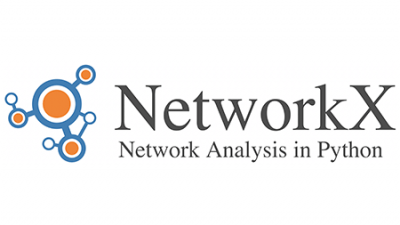

In [2]:
Image(networkx_img)

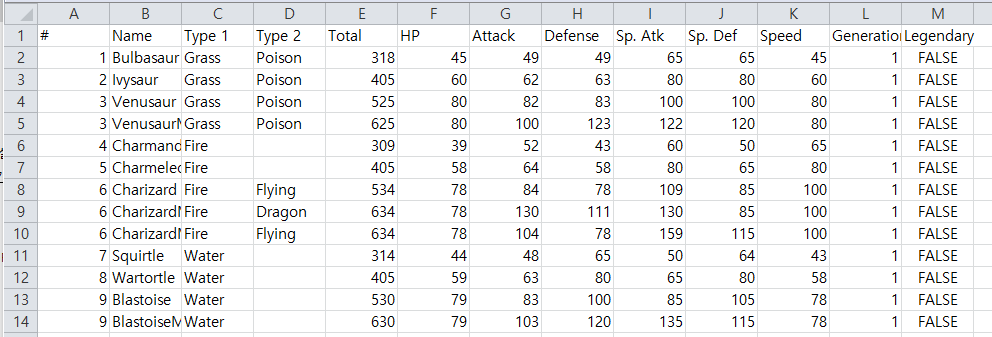

In [3]:
# %ls data\*.csv
Image(pkm_data_cap)

In [4]:
# csv파일 불러오기
df = pd.read_csv(file_name, encoding='utf-8')  # utf-8, euc-kr, cp949
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
df.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [8]:
len(df)

800

In [6]:
#null값이 있는지 확인
len(df.isnull().any())

13

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [10]:
df[df['Type 2'].isnull()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,705,Sliggoo,Dragon,NaN,452,68,75,53,83,113,60,6,False
776,706,Goodra,Dragon,NaN,600,90,100,70,110,150,80,6,False
788,712,Bergmite,Ice,NaN,304,55,69,85,32,35,28,6,False
789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False


In [11]:
#null값 채워주기
df['Type 2'].replace(np.nan, '0', inplace = True) 

In [12]:
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,0,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,0,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,0,314,44,48,65,50,64,43,1,False


In [14]:
"Number of pokemon are: " + str(df['Name'].nunique()) #포켓몬 종류

'Number of pokemon are: 800'

In [16]:
name = pd.DataFrame(df['Name'].unique().tolist(), columns = ['Pokemon']) #포켓몬 종류 DataFrame
name.head()

,Pokemon
0,Bulbasaur
1,Ivysaur
2,Venusaur
3,VenusaurMega Venusaur
4,Charmander


In [17]:
npoke_total = df.copy()
npoke_total.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,0,309,39,52,43,60,50,65,1,False


In [18]:
npoke_total.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [19]:
npoke_total = pd.concat([npoke_total['Name'], df['Total']], axis=1)
npoke_total.head()

,Name,Total
0,Bulbasaur,318
1,Ivysaur,405
2,Venusaur,525
3,VenusaurMega Venusaur,625
4,Charmander,309


### 분석 및 시각화
> 
> - 1) 포켓몬 종류 별 몇 마리? 포켓몬 종류 별 개체수 상위 30에 대한 시각화
> - 2) 종류 별 연관 그래프
> - 3) Type1 별 비율
> - 4) 전설의 포켓몬 vs. 비전설의 포켓몬


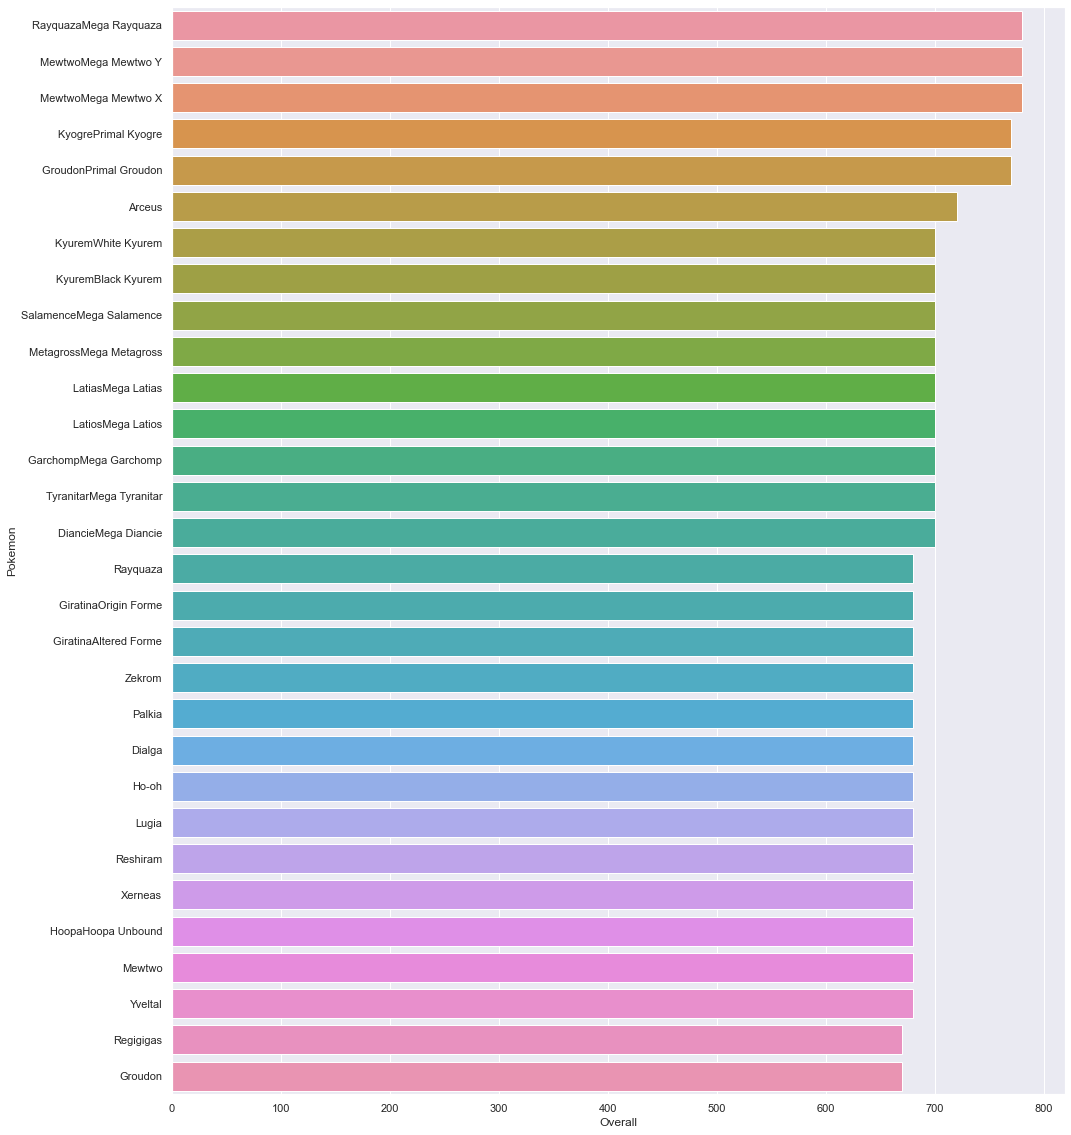

In [35]:
# 포켓몬 종류 별 개체수 상위 30에 대한 시각화
sns.set()
plt.figure(figsize=(16,20))

ax = sns.barplot(x = 'Total', y = 'Name', data = npoke_total.sort_values(by = 'Total', ascending = False).head(30))
ax.set(xlabel = 'Overall', ylabel = 'Pokemon')
plt.show()

#### 종류별 연관 그래프
> 
> - 데이터의 Type1 컬럼을 보면 다른 종류임에도 동일한 Type1 정보를 가지고 있는 케이스가 잇다.
> - 포켓몬을 본지가 너무 오래돼서... Type1이 정확히 뭘 의미하는지는 모르겠지만 (아마도 속성일 것이라 추정) 
> - 포켓몬 종류별로 Type1에 대한 연관성 그래프를 시각화 했다. (드디어 NetworkX 라이브러리 사용!) 

Graph with 818 nodes and 800 edges


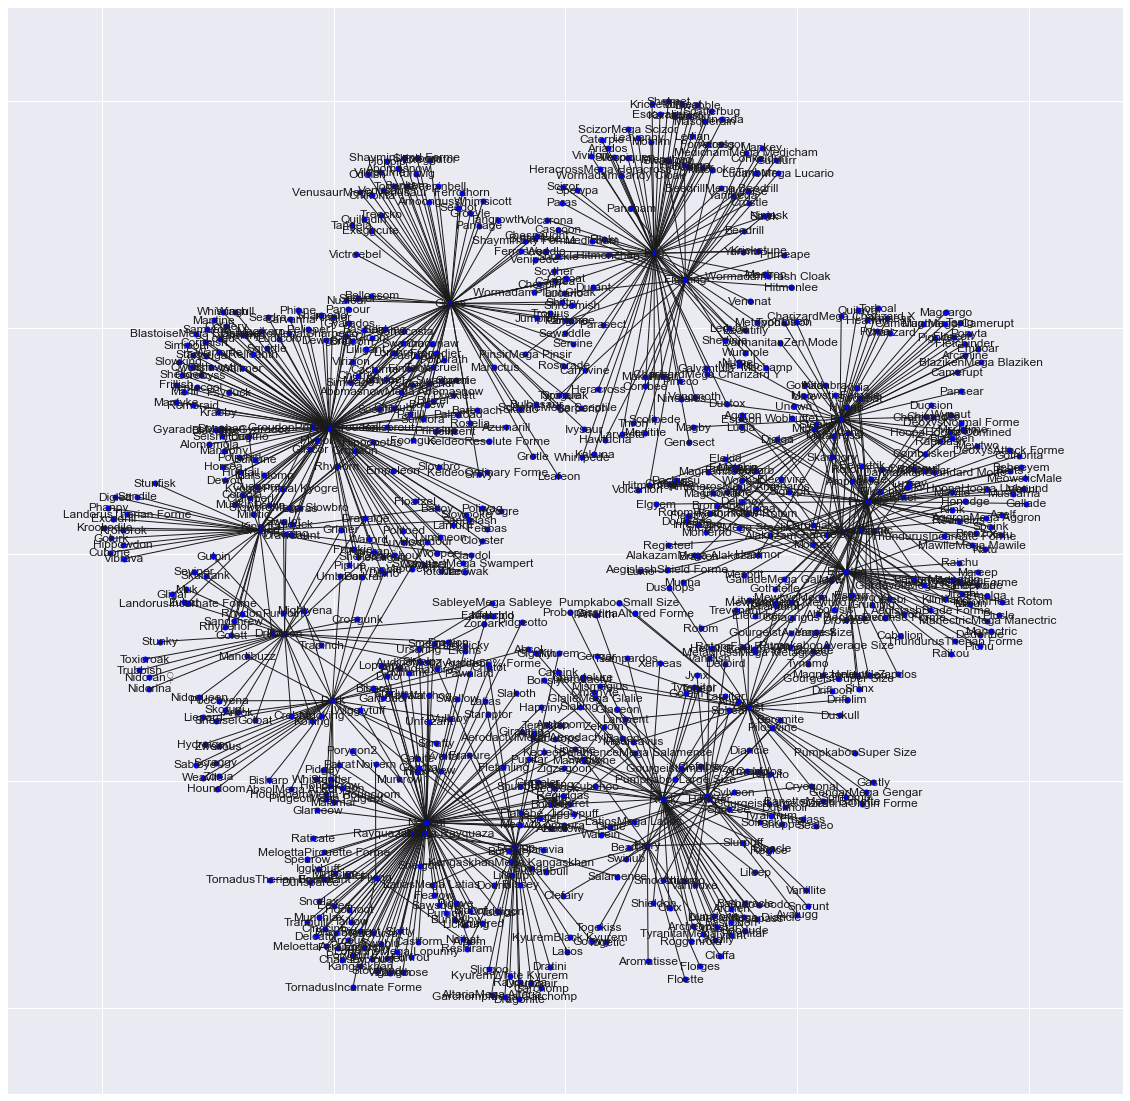

In [39]:
#Network analysis
g = nx.Graph()
g = nx.from_pandas_edgelist(df, source = 'Name', target = 'Type 1')
print(nx.info(g))

plt.figure(figsize=(20, 20))
pos = nx.spring_layout(g, k = 0.15)
nx.draw_networkx(g,pos, node_size = 25, node_color = 'blue')
plt.show()

#### Type1 별 비율
> 
> - 시각화 결과, 물속성의 포켓몬의 개체수가 가장 많고, 요정속성?의 포켓몬 개체수가 가장 적은 것을 확인할 수 있었다.
> - 파이팅 속성은 도대체 뭐지... 공격형 포켓몬이라는 건가? 

explode : [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14]


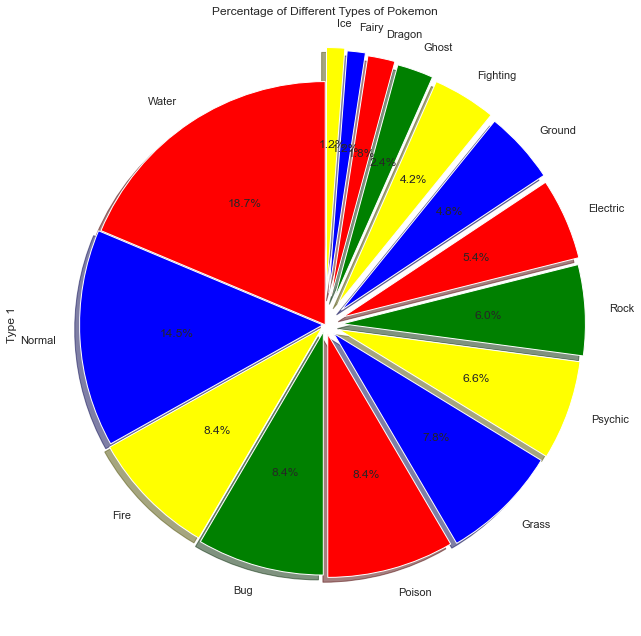

In [45]:
gen1  = df[df.Generation == 1]
types = gen1['Type 1']
explode = np.arange(len(types.unique())) * 0.01
print('explode : {}'.format(explode))

colors = [
    'red',
    'blue',
    'yellow',
    'green'
]

types.value_counts().plot.pie(
    explode=explode,
    colors=colors,
    title="Percentage of Different Types of Pokemon",
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    figsize=(9,9)
)

plt.tight_layout()
plt.show()

#### 전설의 포켓몬 vs. 비전설의 포켓몬

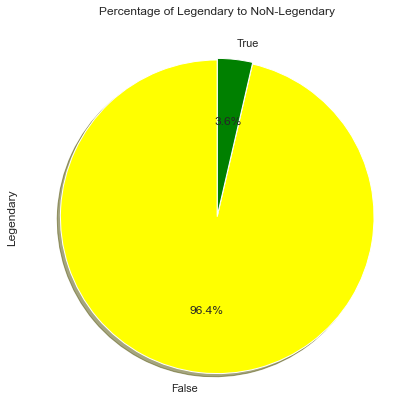

In [46]:
types = gen1['Legendary']
explode = np.arange(len(types.unique())) * 0.01

colors = [
    'yellow',
    'green'
]
types.value_counts().plot.pie(
    explode=explode,
    colors=colors,
    title="Percentage of Legendary to NoN-Legendary",
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    figsize=(6,6)
)

plt.tight_layout()
plt.show()

#### 1세대 포켓몬 대상으로 Type1 연결성 분석

Graph with 181 nodes and 166 edges


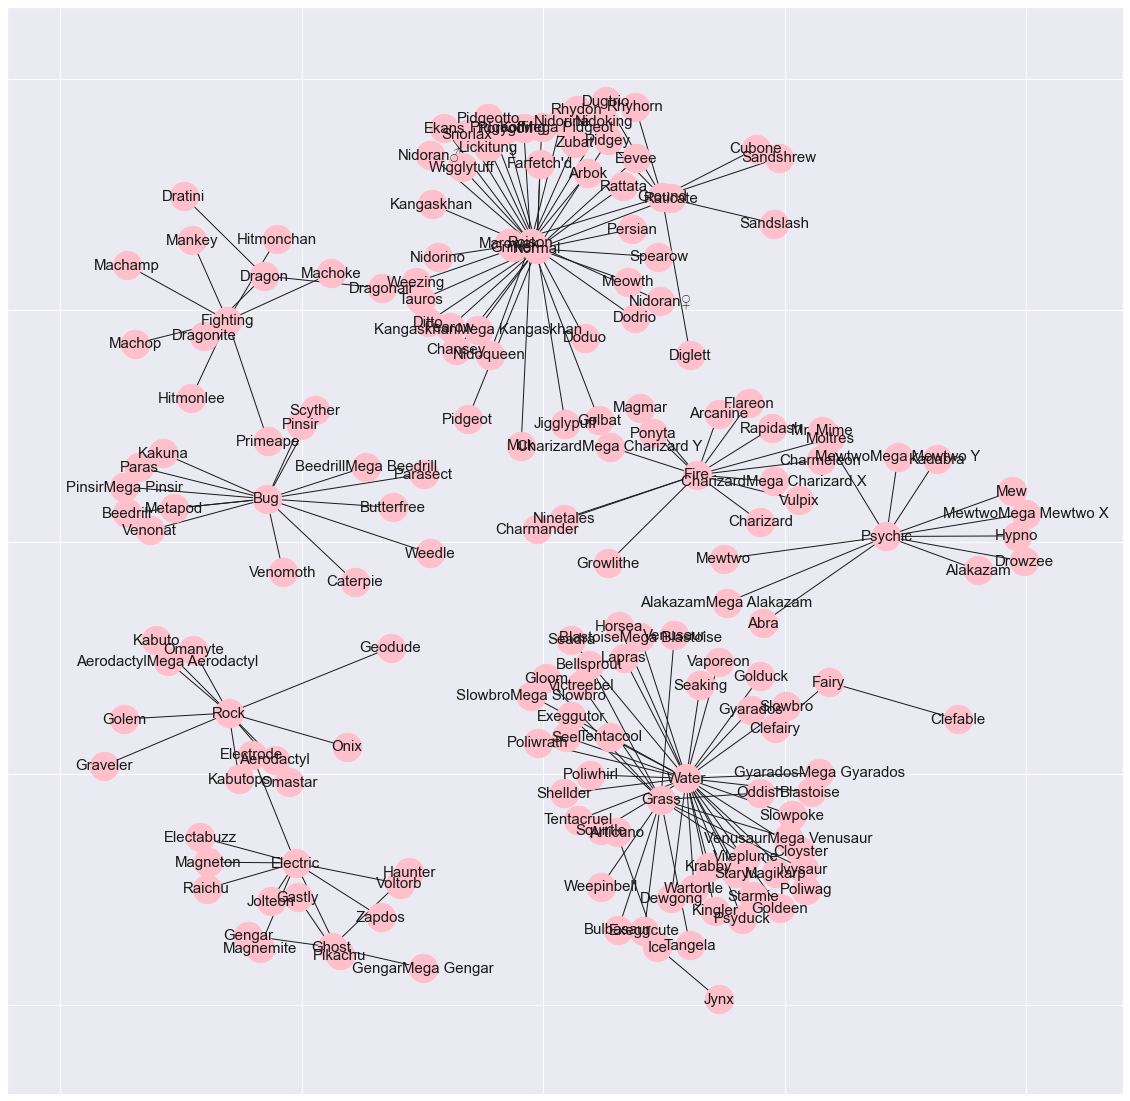

In [59]:
# g = nx.from_pandas_dataframe(gen1,source='Name',target='Type 1')
g = nx.from_pandas_edgelist(gen1,source='Name',target='Type 1')
print(nx.info(g))
nx.Graph()
plt.figure(figsize=(20, 20))
# pos=nx.spring_layout(g, k=0.0319)
pos=nx.spring_layout(g, k=0.2319)
nx.draw_networkx(g,pos,node_size=805, node_color='pink', font_size=15)
plt.show()

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>